In [1]:
%matplotlib inline


Robust detrending examples
==========================

Some toy examples to showcase usage for ``meegkit.detrend`` module.

Robust referencing is adapted from [1]_.

References
----------
.. [1] de Cheveigné, A., & Arzounian, D. (2018). Robust detrending,
   rereferencing, outlier detection, and inpainting for multichannel data.
   NeuroImage, 172, 903-912.




In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

from meegkit.detrend import regress, detrend

import config

np.random.seed(9)

Regression
=============================================================================



Simple regression example, no weights
-----------------------------------------------------------------------------
fit random walk



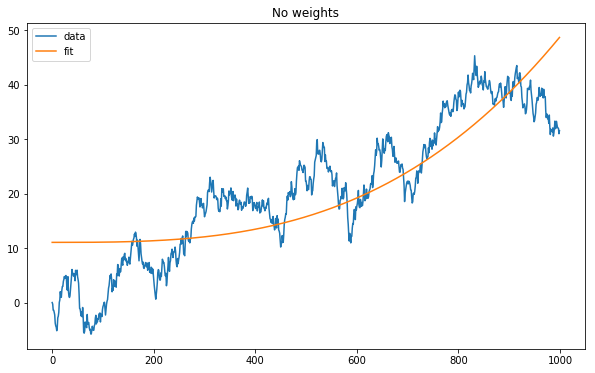

In [3]:
y = np.cumsum(np.random.randn(1000, 1), axis=0)
x = np.arange(1000)[:, None]
x = np.hstack([x, x ** 2, x ** 3])
[b, z] = regress(y, x)

plt.figure(1)
plt.plot(y, label='data')
plt.plot(z, label='fit')
plt.title('No weights')
plt.legend()
plt.show()

Simple regression example, with weights
-----------------------------------------------------------------------------



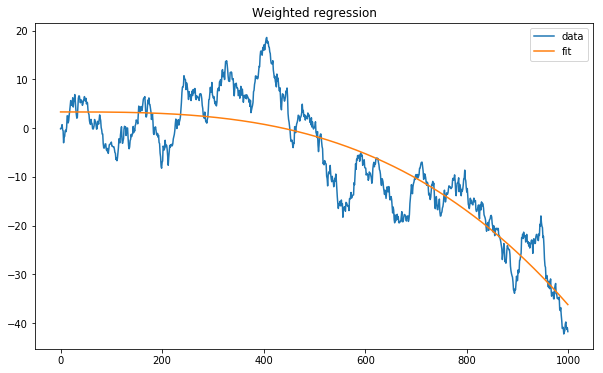

In [4]:
y = np.cumsum(np.random.randn(1000, 1), axis=0)
w = np.random.rand(*y.shape)
[b, z] = regress(y, x, w)

plt.figure(2)
plt.plot(y, label='data')
plt.plot(z, label='fit')
plt.title('Weighted regression')
plt.legend()

Downweight 1st half of the data
-----------------------------------------------------------------------------



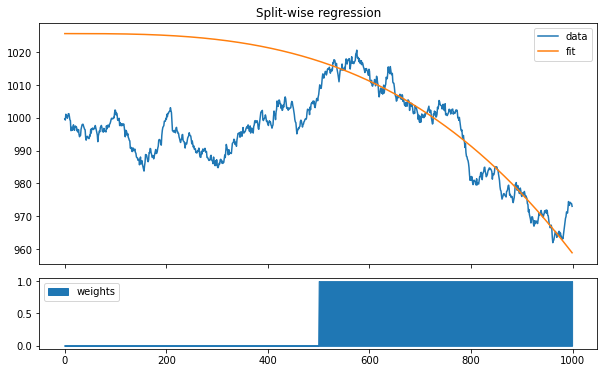

In [5]:
y = np.cumsum(np.random.randn(1000, 1), axis=0) + 1000
w = np.ones(y.shape[0])
w[:500] = 0
[b, z] = regress(y, x, w)

f = plt.figure(3)
gs = GridSpec(4, 1, figure=f)
ax1 = f.add_subplot(gs[:3, 0])
ax1.plot(y, label='data')
ax1.plot(z, label='fit')
ax1.set_xticklabels('')
ax1.set_title('Split-wise regression')
ax1.legend()
ax2 = f.add_subplot(gs[3, 0])
l, = ax2.plot(np.arange(1000), np.zeros(1000))
ax2.stackplot(np.arange(1000), w, labels=['weights'], color=l.get_color())
ax2.legend(loc=2)

Multichannel regression
-----------------------------------------------------------------------------



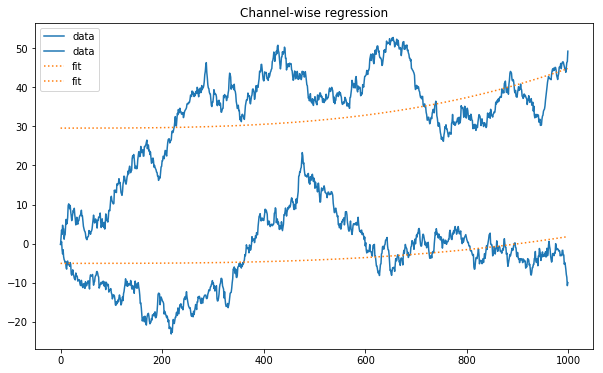

In [6]:
y = np.cumsum(np.random.randn(1000, 2), axis=0)
w = np.ones(y.shape[0])
[b, z] = regress(y, x, w)

plt.figure(4)
plt.plot(y, label='data', color='C0')
plt.plot(z, ls=':', label='fit', color='C1')
plt.title('Channel-wise regression')
plt.legend()

Detrending
=============================================================================



Basic example with a linear trend
-----------------------------------------------------------------------------



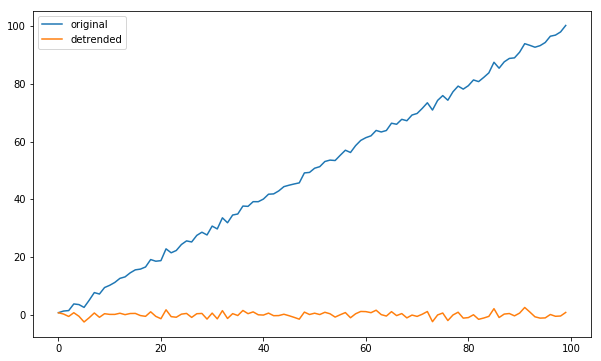

In [7]:
x = np.arange(100)[:, None]
x = x + np.random.randn(*x.shape)
y, _, _ = detrend(x, 1)

plt.figure(5)
plt.plot(x, label='original')
plt.plot(y, label='detrended')
plt.legend()

Detrend biased random walk
-----------------------------------------------------------------------------



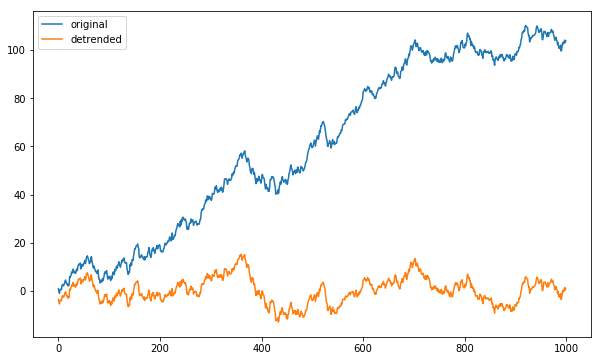

In [8]:
x = np.cumsum(np.random.randn(1000, 1) + 0.1)
y, _, _ = detrend(x, 3)

plt.figure(6)
plt.plot(x, label='original')
plt.plot(y, label='detrended')
plt.legend()

Detrend with weights
-----------------------------------------------------------------------------



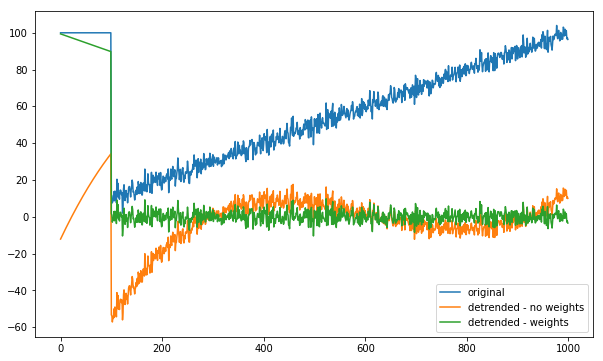

In [9]:
x = np.linspace(0, 100, 1000)[:, None]
x = x + 3 * np.random.randn(*x.shape)

# introduce some strong artifact on the first 100 samples
x[:100, :] = 100

# Detrend
y, _, _ = detrend(x, 3, None)

# Same process but this time downweight artifactual window
w = np.ones(x.shape)
w[:100, :] = 0
yy, _, _ = detrend(x, 3, w)

plt.figure(7)
plt.plot(x, label='original')
plt.plot(y, label='detrended - no weights')
plt.plot(yy, label='detrended - weights')
plt.legend()
plt.show()